# Advanced Programming project
### By Angelo, Elena and Shaya
#### Introduction
This is a small study on factors that influence the satisfaction of airline passengers. When it comes to satisfaction of airline passengers, a lot of factors can contribute to their experience, this can be before, during or after the flight. We found a dataset where we can get an overview of ratings from passengers and their overall satisfaction. Our task is to find out which factors contribute the most to the satisfaction of passengers. We distinguish in the type of class they're flying in.

In [38]:
import seaborn as sns
import pandas as pd

df = pd.read_csv('flight-info-datasets/airline_passenger_satisfaction.csv')
df['Age'] = df['Age'].apply(pd.to_numeric) #convert age to numeric values
df = df[df['Age'] >= 18] #select rows with passengers age 18 and over
df['Satisfaction'].value_counts(normalize=True)

Neutral or Dissatisfied    0.543617
Satisfied                  0.456383
Name: Satisfaction, dtype: float64

In [39]:
df['Class'].value_counts(normalize=True)

Business        0.504178
Economy         0.426199
Economy Plus    0.069623
Name: Class, dtype: float64

Out of the intial dataset we can already see that more than half of airline passengers felt neutral or dissatisfied about their flight. In addition, the dataset consists the most out of business class and least out of economy plus.

In [71]:
# Angelo
df.head() # Overview of dataframe (5 rows)

,ID,Gender,Age,Customer Type,Type of Travel,Class,Flight Distance,Departure Delay,Arrival Delay,Departure and Arrival Time Convenience,...,On-board Service,Seat Comfort,Leg Room Service,Cleanliness,Food and Drink,In-flight Service,In-flight Wifi Service,In-flight Entertainment,Baggage Handling,Satisfaction
0,1,Male,48,First-time,Business,Business,821,2,5.0,3,...,3,5,2,5,5,5,3,5,5,Neutral or Dissatisfied
1,2,Female,35,Returning,Business,Business,821,26,39.0,2,...,5,4,5,5,3,5,2,5,5,Satisfied
2,3,Male,41,Returning,Business,Business,853,0,0.0,4,...,3,5,3,5,5,3,4,3,3,Satisfied
3,4,Male,50,Returning,Business,Business,1905,0,0.0,2,...,5,5,5,4,4,5,2,5,5,Satisfied
4,5,Female,49,Returning,Business,Business,3470,0,1.0,3,...,3,4,4,5,4,3,3,3,3,Satisfied


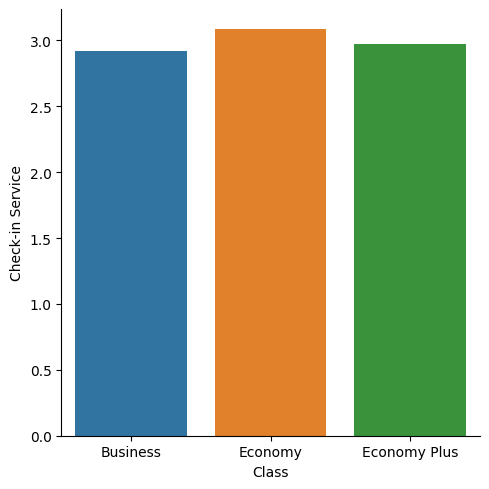

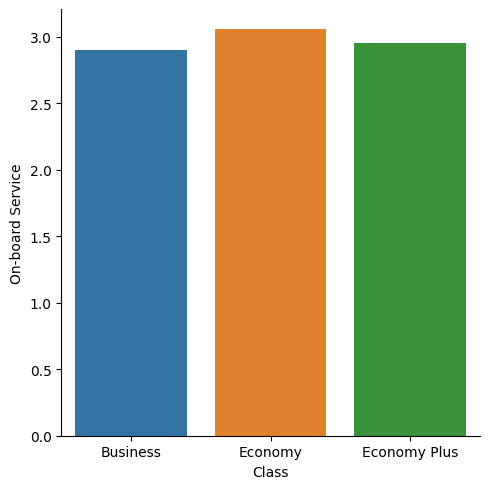

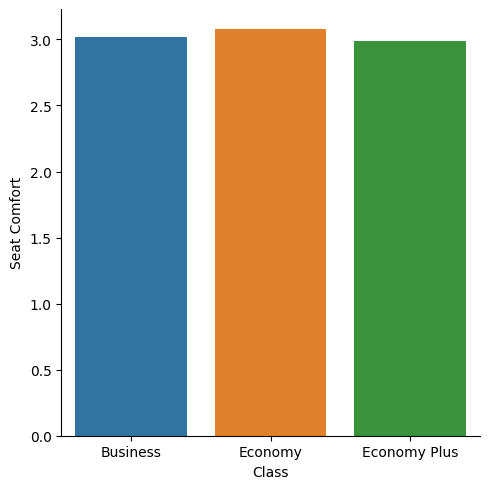

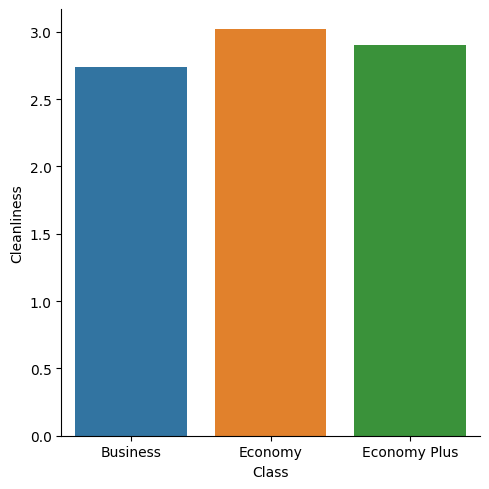

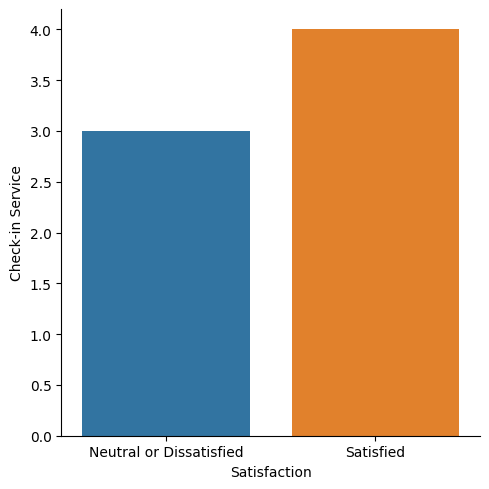

In [72]:
#Shaya
df[['Check-in Service', 'On-board Service', 'Seat Comfort', 'Cleanliness', 'Satisfaction']]
dissat = df[df['Satisfaction'] != 'Satisfied'] # selection of dissatisfied passengers


def plotgraph(factor):
    """Plots figure with satisfied and dissatisfied passengers' ratings based on given factor(column)."""
    dataportion = df.groupby('Satisfaction')[factor].median().reset_index()
    return sns.catplot(data=dataportion, x='Satisfaction', y=factor, kind="bar")


def byclass(factor):
    """Plots figure of dissatisfied passengers' ratings of factors divided by class."""
    sets = dissat.groupby('Class')[factor].mean().reset_index()
    return sns.catplot(data=sets, x='Class', y=factor, kind="bar")

byclass('Check-in Service')
byclass('On-board Service')
byclass('Seat Comfort')
byclass('Cleanliness')
plotgraph('Check-in Service')

Findings above tell us that the differences between the ratings of the factors are not high. However, one visible change is seen in cleanliness, business class has a lower rating compared to the other factors and classes.

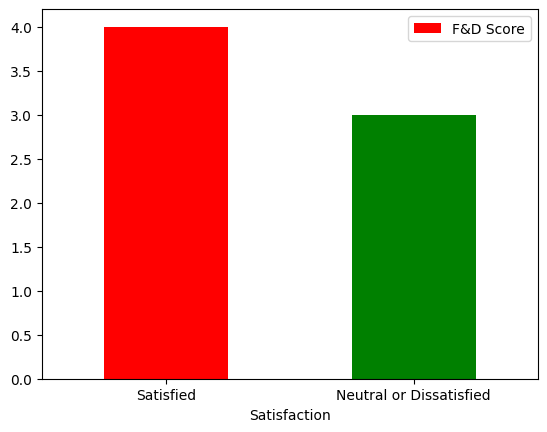

In [73]:
# Angelo
# Compares median F&D score of both satisfaction levels
satisfied = df[df['Satisfaction'] == 'Satisfied']['Food and Drink'].median()
unsatisfied = df[df['Satisfaction'] == 'Neutral or Dissatisfied']['Food and Drink'].median()
fd_score_df = pd.DataFrame({'Satisfaction':['Satisfied', 'Neutral or Dissatisfied'], 'F&D Score':[satisfied, unsatisfied]})
fd_score_df.plot.bar(x='Satisfaction', y='F&D Score', color=['red', 'green'], rot=0);

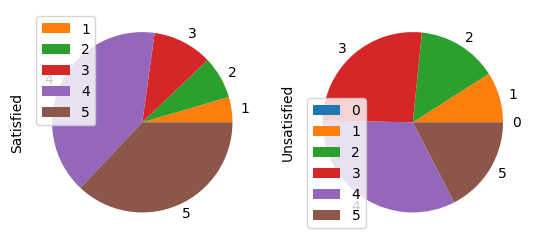

In [89]:
def pair_to_subpies(dframe, category, column, chosen_vals):
    '''For category plots pie subplot pair for chosen values of a dataframe column visualizing category value-counts'''
    ser_list = form_pair(dframe, category, column, chosen_vals)
    plot_pie_subplots(ser_list[0], ser_list[1])
         
        
def form_pair(dframe, categ, col, chosen_vals):
    '''Forms value-counted series of a category for both chosen values of a dataframe column'''
    series1 = dframe[dframe[col] == chosen_vals[0]][categ].value_counts()
    series2 = dframe[dframe[col] == chosen_vals[1]][categ].value_counts()
    return series1, series2


def plot_pie_subplots(satis_vals, unsatis_vals):
    '''Forms dataframe of 2 series and displays them as pie subplots'''
    pair_vals_df = pd.DataFrame({'Satisfied': satis_vals, 'Unsatisfied': unsatis_vals})[0:6] # Scores 1-5
    return pair_vals_df.plot.pie(subplots=True);

pair_to_subpies(df, 'In-flight Service', 'Satisfaction', ['Satisfied', 'Neutral or Dissatisfied'])

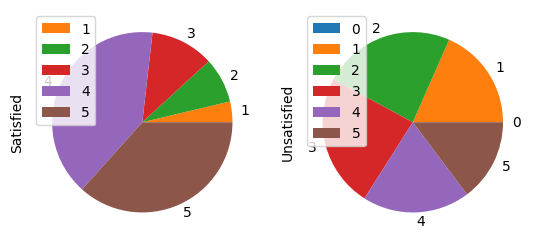

In [90]:
# In-flight Entertainment
pair_to_subpies(df, 'In-flight Entertainment', 'Satisfaction', ['Satisfied', 'Neutral or Dissatisfied'])

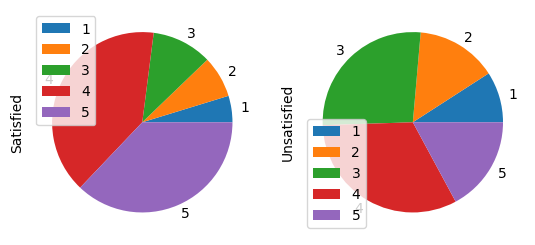

In [91]:
# Baggage Handling
pair_to_subpies(df, 'Baggage Handling', 'Satisfaction', ['Satisfied', 'Neutral or Dissatisfied'])